
# 项目：未前往就诊的挂号预约调查数据集（Kaggle的原始数据）

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

本数据集包含10万条巴西预约挂号的求诊信息，研究病人是否如约前往医院就诊。每行数据录入了有关患者特点的多个数值，包括 “预约日期 (ScheduledDay)”指患者具体预约就诊的日期；“街区 (Neighborhood) ”指医院所在位置；“福利保障 (Scholarship)”说明病人是否是巴西福利项目 Bolsa Família 的保障人群；请注意最后一列内容的编码：“No”表示病人已如约就诊，“Yes”说明病人未前往就诊。

我的目的是研究这些数据，并确定是否有什么重要的因素可以告诉我哪些病人更有可能如约就诊，哪些病人更有可能不会前往就诊。具体来说，我主要是为了探究以下因素是否会影响病人是否会如约就诊：

·Gender(性别)

·Day of the week of the appointment(预约的是周几)

·Number of days appointment is made in advance(提前预约的天数)

·Age(年龄)

·Degree of handicap(障碍的等级)

以及病人是否：

·Received medical welfare(收到医疗福利)

·Were diagnosed with hypertension, diabetes, or alcoholism(被诊断为高血压，糖尿病或者酗酒)

·Received SMS notification before the appointment(在预约前收到短信通知)

In [2]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 务必包含一个‘magic word’（带有“%”的***），以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问该网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## 数据整理

> **提示**：在报告的这一部分中载入数据，检查简洁度，然后整理和清理数据集，以便进行分析。请务必将步骤仔细归档，并确定清理决策是否正确。

### 常规属性

In [3]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> 首先阐述一下每一列的数据代表了什么：

>  Patientld:代表每一个病人的id；

>  AppointmentID:代表每一个预约的id；

>  Gender:代表病人的性别，男／女；

>  ScheduledDay:代表预约建立的日期；

>  AppointmentDay:代表预约被安排的日期；

>  Age:代表病人的年龄；

>  Neighbourhood:代表医院的位置；

>  Scholarship:代表是否病人是否注册了巴西的福利项目；

>  Hipertension:代表是否病人是否有高血压；

>  Diabetes:代表是否病人是否有糖尿病；

>  Alcoholism:代表是否病人是否酗酒；

>  Handcap:代表病人残疾的等级；

>  SMS_received:代表病人是否在预约前受到了短信通知；

>  No-show:代表病人是否在预约日期出现了；

首先检查每一列唯一值的个数(主要是为了确认各个因素在表格中的值是不是二进制):

In [4]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

从结果可以看出一共有27个不同的预约日期，通过确认预约日期的最大值与最小值来得出所有预约所覆盖的时间长度：

In [5]:
print(df.AppointmentDay.min())
print(df.AppointmentDay.max())

2016-04-29T00:00:00Z
2016-06-08T00:00:00Z


从结果可以看出，所有的预约数据是在2016年4月29日到2016年6月8日不到两个月的时间内收集到的，因此，所有的数据分析的观察以及结论仅能代表这段时间内的数据分布，不能套用到其他时间段内。

然后检查每一列数据内是否存在空值，以及每列数据的类型：

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


从结果可以看出，每一列数据内都没有数据丢失。从每一列的名字可以看出，有些列的名字存在一些错误，接下来先修正这些名字：

In [7]:
#先将名字大小写统一，转换成全部是小写
df.columns = df.columns.str.lower()

#将有问题的名字全部替换
df.rename(index = str, columns = {'hipertension' : 'hypertension', 'no-show':'no_show', 'handcap':'handicap'}, inplace = True)


然后，我检查"age"列，查看是否存在异常值，同时查看一下年龄的范围是多少：

In [8]:
df['age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

从结果可以看出，最大年龄是115岁，最小年龄是-1岁，很明显，最小年龄是有问题的，所以我需要进一步查看"age"列的相关数据统计：

In [9]:
#统计从小到大年龄的个数，取前20个年龄查看
df['age'].value_counts().sort_index().head(20)

-1        1
 0     3539
 1     2273
 2     1618
 3     1513
 4     1299
 5     1489
 6     1521
 7     1427
 8     1424
 9     1372
 10    1274
 11    1195
 12    1092
 13    1103
 14    1118
 15    1211
 16    1402
 17    1509
 18    1487
Name: age, dtype: int64

从结果可以看出，0岁的值也有3539个，不过0岁可以理解为不满1岁的婴儿，所以是合理的，但是-1岁是不可能存在的。由于-1岁只有1个，而总共的数据个数超过了100000个，所以对于其他的统计数据来说是一个非常非常小的值，所以我认为可以直接删掉这个异常值：

In [10]:
#删除最小年龄-1岁
df.drop(df.query('age == -1').index, inplace=True)

接下来，我通过绘制直方图来检查"age"列的分布情况：

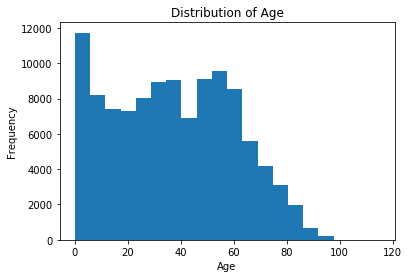

In [11]:
plt.hist(df['age'], bins = 20);
plt.title('Distribution of Age');
plt.xlabel('Age');
plt.ylabel('Frequency');

从结果可以看出，年龄分布严重向右倾斜，80岁以上的人相当少，但是不能因为80岁的人少就将他们排除在外，因为这些数据也是有效的。因此，如果能创建一个新的列重新分配一下各个年龄段的数据可能会对以后的分析有帮助。于是我们建立一个名为"age_group"的新列来重新分配这些数据，将每10岁作为一个阶段重新分配，通过建立新的函数来完成：

In [12]:
#建立名为age_category的函数
def age_category(x):
    """ Build a function to put each age into new age categories.
        Input:
        x -- age
        Output:
        strings represent age categories
    """
    if x <= 9:
        return('0-9')
    elif x <= 19:
        return('10-19')
    elif x <= 29:
        return('20-29')
    elif x <= 39:
        return('30-39')
    elif x <= 49:
        return('40-49')
    elif x <= 59:
        return('50-59')
    elif x <= 69:
        return('60-69')
    elif x <= 79:
        return('70-79')
    else:
        return('>=80')

#建立"age_category"列
df['age_category'] = df['age'].apply(age_category)

#转换"age_category"列的数据类型
df['age_category'] = df['age_category'].astype('category')

#重新排序"age_category"列
df['age_category'].cat.reorder_categories(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '>=80'], inplace = True)


利用上述步骤建立的新列"age_category"，重新绘制统计图：

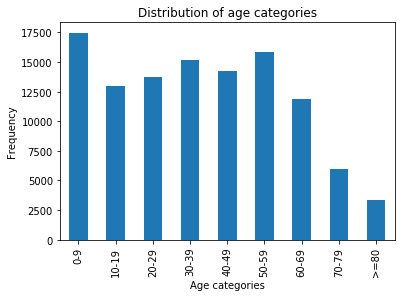

In [13]:
df['age_category'].value_counts().sort_index().plot(kind = 'bar');
plt.title('Distribution of age categories');
plt.xlabel('Age categories');
plt.ylabel('Frequency');

从结果可以看出，虽然分类以后还是没有看出很明显的分布情况，但是相比于之前的直方图来说，数据相对更加平滑了，大于80岁的数据整合到一起以后使整个图像更加集中，而不是偏向右侧。



### 数据清理（请用更具体的标题来代替该标题。）

接下来，需要对数据进行清理。首先对与时间相关的数据类型进行转换，由之前的检查可以发现，"scheduledday"和"appointmentday"两列的数据是与时间相关的，且目前的数据类型是string类型，因此需要转换成datetime。

In [14]:
# 将相关列中的数据转换成datetime的数据
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_category
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,60-69
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,50-59
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,60-69
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-9
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,50-59


根据结果可以看出，"scheduledday"包含年月日以及具体的时间(包括时分秒的信息)，而"appointmentday"仅仅包含年月日的信息，这一部分信息的缺失将有可能对之后的数据分析产生影响。

接下来，根据之前的猜测，预约的日期位于一周中的周几可能对病人是否出现在预约时间产生影响，所以需要新创建一个名为"appointmentday_weekday"的列储存相关的数据：

In [15]:
#获得具体日期是周几
df['appointmentday_weekday'] = df['appointmentday'].dt.strftime('%A')
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_category,appointmentday_weekday
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,60-69,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,50-59,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,60-69,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-9,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,50-59,Friday


接下来，根据之前的猜测，我第二个感兴趣的是提前预约的天数。要得到提前预约的天数，需要用"appointmentday"减去"scheduledday"，但是目前"scheduledday"的数据包含具体时间，需要将具体时间删去才能将两列数据做减法：

In [16]:
#删去scheduledday中的具体时间
df['scheduledday'] = df['scheduledday'].dt.strftime('%Y-%m-%d')

#再次将scheduledday列中的数据类型从string转换为datetime
df['scheduledday'] = pd.to_datetime(df['scheduledday'])

#通过两列想减获得提前预约的天数
df['days_in_advance'] = df['appointmentday'] - df['scheduledday']

#提取所获的天数中的数字部分
df['days_in_advance'] = df['days_in_advance'].dt.days
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_category,appointmentday_weekday,days_in_advance
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,60-69,Friday,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,50-59,Friday,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,60-69,Friday,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-9,Friday,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,50-59,Friday,0


创建出新数据列以后，首先检查一下有没有异常值：

In [17]:
df['days_in_advance'].describe()

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: days_in_advance, dtype: float64

根据结果可以看出最小值为-6，这是异常值，因为不可能预约的日期在做预约的日期的前面，继续进一步查看所有的值，找出所有可能存在的异常值：

In [18]:
df['days_in_advance'].value_counts().sort_index().head(20)

-6         1
-1         4
 0     38562
 1      5213
 2      6725
 3      2737
 4      5290
 5      3277
 6      4037
 7      4906
 8      2332
 9      1605
 10     1391
 11      987
 12     1115
 13     1682
 14     2913
 15     1503
 16     1151
 17     1107
Name: days_in_advance, dtype: int64

从上面的结果可以看出存在两类异常值，一个是"-6"，一个是"-1"。由于两种数据存在的个数是5，相较于所有的数据的个数来说微乎其微，于是我决定直接删去这些异常值：

In [19]:
#删去'days_in_advance'列中小于0的数据
df.drop(df[df['days_in_advance'] < 0].index, inplace=True)

根据清理完成的'day_in_advance'列，绘制直方图反映数据的分布：

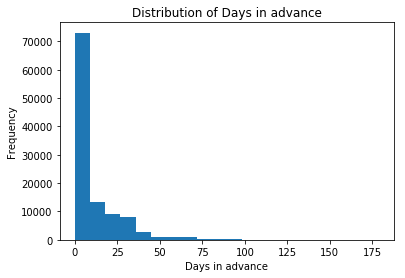

In [20]:
plt.hist(df['days_in_advance'], bins = 20);
plt.title('Distribution of Days in advance');
plt.xlabel('Days in advance');
plt.ylabel('Frequency');

从上图的结果可以看出，绝大多数的预约都是提前5天以内完成的，虽然也存在一些提前20到30天，或者更多天的预约，但是可以看出相对来说这部分的数据很少，所以根据之前的经验，依旧可以重新分组并创建新的列，以新列来绘制更加完善合理的柱形图来描绘数据的趋势。

In [21]:
#建立名为day_category的函数
def day_category(x):
    """ Build a function to put each day in advance into new age categories.
        Input:
        x -- day in advance
        Output:
        strings represent age categories
    """
    if x == 0:
        return('same day')
    elif x <= 3:
        return('1-3 days')
    elif x <= 7:
        return('4-7 days')
    elif x <= 21:
        return('1-3 weeks')
    elif x <= 42:
        return('4-6 weeks')
    elif x <= 56:
        return('7-8 weeks')
    else:
        return('more than 2 months')

#建立"day_category"列
df['day_category'] = df['days_in_advance'].apply(day_category)

#转换"day_category"列的数据类型
df['day_category'] = df['day_category'].astype('category')

#重新排序"age_category"列
df['day_category'].cat.reorder_categories(['same day', '1-3 days', '4-7 days', '1-3 weeks', '4-6 weeks', '7-8 weeks', 'more than 2 months'], inplace = True)

df.head()


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_category,appointmentday_weekday,days_in_advance,day_category
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,60-69,Friday,0,same day
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,50-59,Friday,0,same day
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,60-69,Friday,0,same day
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-9,Friday,0,same day
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,50-59,Friday,0,same day


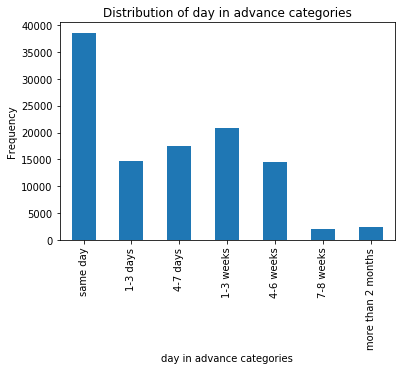

In [22]:
df['day_category'].value_counts().sort_index().plot(kind = 'bar');
plt.title('Distribution of day in advance categories');
plt.xlabel('day in advance categories');
plt.ylabel('Frequency');

从重新分组以后作出的柱形统计图可以看到，预约在同一天的数量是最多的，其次为1-3周的，相较于之前的直方图，精确到天以及周以后数据有了不同的趋势，但是整体的趋势还是预约日期与做预约日期越近，出现的频率越高。

接下来需要对"no_show"列进行数据清理，将数据类型由string变为int类型，以方便之后的数据探索，具体做法为当数据为"No"时，改变为"0"，当数据为"Yes"时，改变为"1"。

In [23]:
df['no_show'] = df['no_show'].apply(lambda x: 0 if x == 'No' else 1)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_category,appointmentday_weekday,days_in_advance,day_category
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,60-69,Friday,0,same day
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,50-59,Friday,0,same day
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,60-69,Friday,0,same day
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0-9,Friday,0,same day
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,50-59,Friday,0,same day


<a id='eda'></a>
## 探索性数据分析

> **提示**在你完成数据整理和清理之后，现在可以进行探索性数据分析了。你需要计算统计值，创建可视化图表，解决你在一开始的简介部分中提出的研究问题。我们推荐你采用系统化方法。一次只探索一个变量，然后探索变量之间的关系。

### 研究问题 1: 是否病人的性别会影响在预约的日期出现？

In [36]:
#通过使用groupby函数将'gender'和'no_show'列聚合到一起，然后计算每种性别的平均出现的次数：
df_gender = df.groupby('gender')['no_show'].mean()
df_gender

gender
F    0.203115
M    0.199638
Name: no_show, dtype: float64

In [37]:
#然后将每个计算了爽约率的变量人口数量分布进行可视化：
df.groupby('gender')['patientid'].count()

gender
F    71836
M    38685
Name: patientid, dtype: int64

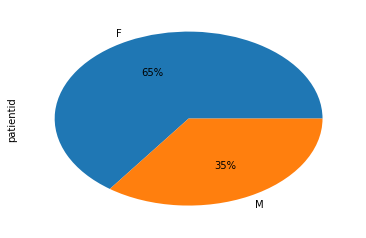

In [43]:
df.groupby('gender')['patientid'].count().plot(kind = 'pie', autopct = '%.0f%%');

根据饼图可以看出，两个性别的人数占比相对来说是比较合理的，不会出现人数特别少的情况，基本对半分，同时说明观察的样本数量相对来说是足够的。

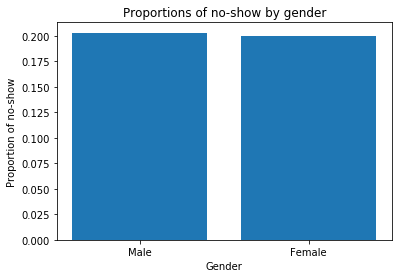

In [25]:
#接下来将得到的数据进行可视化，我选择使用柱状图：
locations = [1, 2]
heights = df_gender.values
labels = ['Male', 'Female']
plt.bar(locations, heights, tick_label=labels)
plt.title('Proportions of no-show by gender')
plt.xlabel('Gender')
plt.ylabel('Proportion of no-show');

从柱状图可以看出，每种性别的平均出现次数没有太大的分别，所以我认为性别对于是否病人会在预约的日期出现并没有什么影响。

### 研究问题 2: 预约的时间在工作日还是周末(除了周日)是否会影响病人在预约日期出现？

In [26]:
#首先通过使用groupby函数将'appointmentday_weekday'和'no_show'列聚合到一起，然后计算每个工作日的平均出现的次数：
df_weekday = df.groupby('appointmentday_weekday')['no_show'].mean()
df_weekday

appointmentday_weekday
Friday       0.212261
Monday       0.206446
Saturday     0.230769
Thursday     0.193494
Tuesday      0.200874
Wednesday    0.196861
Name: no_show, dtype: float64

In [39]:
#然后将每个计算了爽约率的变量人口数量分布进行可视化：
df.groupby('appointmentday_weekday')['patientid'].count()

appointmentday_weekday
Friday       19019
Monday       22713
Saturday        39
Thursday     17246
Tuesday      25638
Wednesday    25866
Name: patientid, dtype: int64

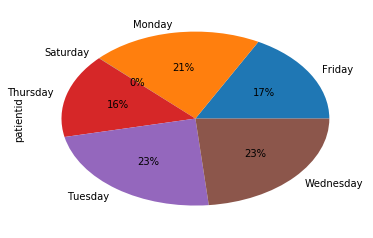

In [44]:
df.groupby('appointmentday_weekday')['patientid'].count().plot(kind = 'pie', autopct = '%.0f%%');

根据饼图可以看出，除了周六统计的数量特别少，只有39次以外，其他的工作日的统计数量都还算正常，说明这个统计的结果可能存在偶然因素。

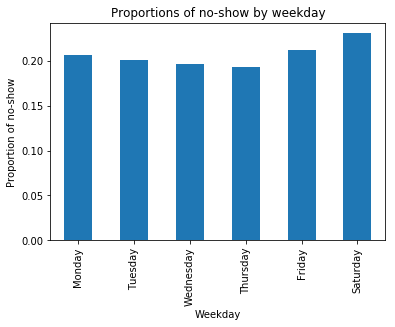

In [27]:
#接下来将得到的数据进行可视化，我选择使用柱状图：
weekday_labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
df_weekday = df_weekday[weekday_labels]
df_weekday.plot(kind='bar')
plt.title('Proportions of no-show by weekday')
plt.xlabel('Weekday')
plt.ylabel('Proportion of no-show');

根据柱状图可以看出，病人在预约时间不出现的比例在周五和周六更高，其中周六的比例最高。由此可见，预约时间在工作日还是周末(除开周日)会影响病人在预约日期出现，在周末(除开周日)不出现的概率比工作日更高。

### 研究问题 3: 预约的时间距离做预约的时间越远是否越会影响病人在预约日期出现？

In [28]:
#首先通过使用groupby函数将'day_category'和'no_show'列聚合到一起，然后计算每个工作日的平均出现的次数：
df_day_category = df.groupby('day_category')['no_show'].mean()
df_day_category

day_category
same day              0.046471
1-3 days              0.228893
4-7 days              0.252027
1-3 weeks             0.312216
4-6 weeks             0.336793
7-8 weeks             0.319182
more than 2 months    0.297242
Name: no_show, dtype: float64

In [41]:
#然后将每个计算了爽约率的变量人口数量分布进行可视化：
df.groupby('day_category')['patientid'].count()

day_category
same day              38562
1-3 days              14675
4-7 days              17510
1-3 weeks             20899
4-6 weeks             14454
7-8 weeks              1955
more than 2 months     2466
Name: patientid, dtype: int64

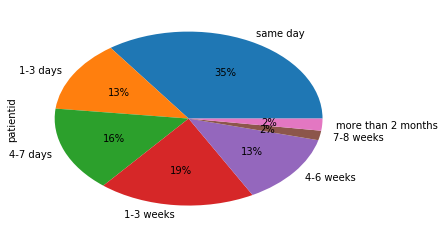

In [45]:
df.groupby('day_category')['patientid'].count().plot(kind = 'pie', autopct = '%.0f%%');

根据饼图可以看出,7周以上的统计数量相对来说少了很多，可能使结果存在偶然性。

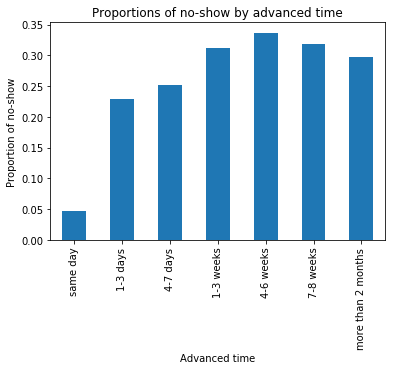

In [29]:
#接下来将得到的数据进行可视化，我选择使用柱状图：
df_day_category.plot(kind='bar')
plt.title('Proportions of no-show by advanced time')
plt.xlabel('Advanced time')
plt.ylabel('Proportion of no-show');

根据柱状图可以看出提前4-8周预约的病人更有可能在预约日期不出现，同时，提前1-3周预约的病人不出现的几率也很高。且由图可见病人在预约日期不出现的概率是随着提前时间的变长而变高的，所以预约的时间距离做预约的时间越远，越会提高病人在预约日期内不出现的概率。

### 研究问题 4: 病人的年龄是否越会影响病人在预约日期出现？

In [30]:
#首先通过使用groupby函数将'age_category'和'no_show'列聚合到一起，然后计算每个工作日的平均出现的次数：
df_age_category = df.groupby('age_category')['no_show'].mean()
df_age_category

age_category
0-9      0.199325
10-19    0.251720
20-29    0.246678
30-39    0.217469
40-49    0.202688
50-59    0.174998
60-69    0.150724
70-79    0.152005
>=80     0.163296
Name: no_show, dtype: float64

In [33]:
#然后将每个计算了爽约率的变量人口数量分布进行可视化：
df.groupby('age_category')['patientid'].count()

age_category
0-9      17474
10-19    12935
20-29    13698
30-39    15170
40-49    14209
50-59    15863
60-69    11876
70-79     5934
>=80      3362
Name: patientid, dtype: int64

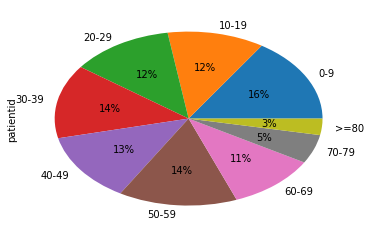

In [34]:
df.groupby('age_category')['patientid'].count().plot(kind = 'pie', autopct = '%.0f%%')

根据饼图可以看出，每个年龄段的人数相对来说是比较合理的，不会出现人数特别少的情况，全都保持在300以上，说明观察的样本数量相对来说是足够的。

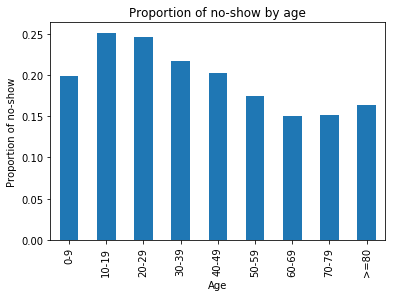

In [154]:
#接下来将得到的数据进行可视化，我选择使用柱状图：
df_age_category.plot(kind='bar')
plt.title('Proportion of no-show by age')
plt.xlabel('Age')
plt.ylabel('Proportion of no-show');

根据柱状图可以看出，处于10-29岁之间的病人有更高的几率在预约日期不出现，其中10-19岁这一段拥有最高的概率不出现。但是这个结果不具有代表性，因为每个年龄段的统计数据都偏少，同时，病人在预约日期不出现的概率没有随着年龄的增长而完全呈现下降的趋势，在70岁以后的几率反而有所回升，所以，最后的结果是病人的年龄在一定层面上会影响病人在预约日期出现的概率，但是没有特别明显的规律。

### 研究问题 5: 病人是否拥有医疗福利，是否被诊断为高血压，糖尿病或者酗酒，以及是否在预约前收到短信通知会不会影响病人在预约日期出现？

最后一个问题，将表格内的其余所有的因素进行分析，判断它们是否会影响病人在预约日期出现，因为这些因素的数据全是"0"和"1"，所以相对地，将所有的因素集合到一起进行分析。

首先对病人是否拥有医疗福利进行分析：

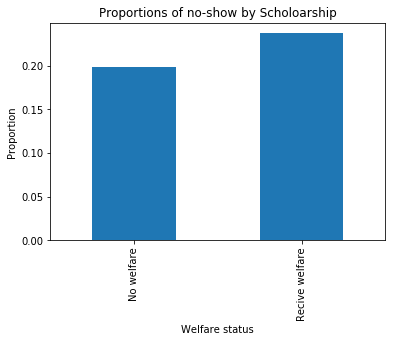

In [160]:
df.groupby('scholarship')['no_show'].mean().plot(kind = 'bar')
location = [0,1]
labels = ['No welfare', 'Recive welfare']
plt.title('Proportions of no-show by Scholoarship');
plt.xticks(location,labels);
plt.xlabel('Welfare status');
plt.ylabel('Proportion');

根据柱形图，可以粗略看出，拥有医疗福利的病人更可能在预约日期不出现。

然后对病人是否被诊断为高血压进行分析：

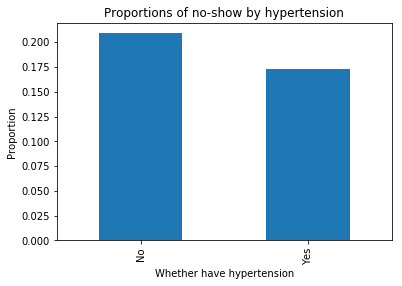

In [161]:
df.groupby('hypertension')['no_show'].mean().plot(kind = 'bar')
location = [0,1]
labels = ['No', 'Yes']
plt.title('Proportions of no-show by hypertension');
plt.xticks(location,labels);
plt.xlabel('Whether have hypertension');
plt.ylabel('Proportion');

根据柱形图，可以粗略看出，没有被诊断为高血压的病人更可能在预约日期不出现。

接下来对病人是否诊断为糖尿病进行分析：

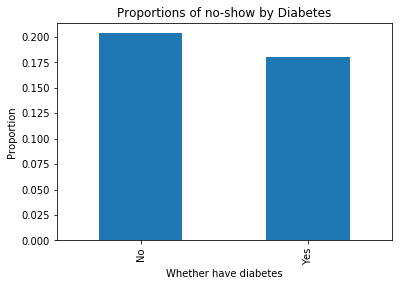

In [162]:
df.groupby('diabetes')['no_show'].mean().plot(kind = 'bar')
location = [0,1]
labels = ['No', 'Yes']
plt.title('Proportions of no-show by Diabetes');
plt.xticks(location,labels);
plt.xlabel('Whether have diabetes');
plt.ylabel('Proportion');

根据柱形图，可以粗略看出，没有被诊断为糖尿病的病人更可能在预约日期不出现。

接下来对病人是否诊断为酗酒进行分析：

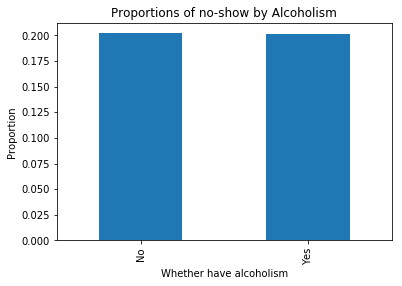

In [163]:
df.groupby('alcoholism')['no_show'].mean().plot(kind = 'bar')
location = [0,1]
labels = ['No', 'Yes']
plt.title('Proportions of no-show by Alcoholism');
plt.xticks(location,labels);
plt.xlabel('Whether have alcoholism');
plt.ylabel('Proportion');

根据柱形图，可以粗略看出，病人有没有被诊断为酗酒对病人是否会在预约日期出现没有影响。

接下来对病人的残疾等级是否会对在预约日期出现有影响进行分析：

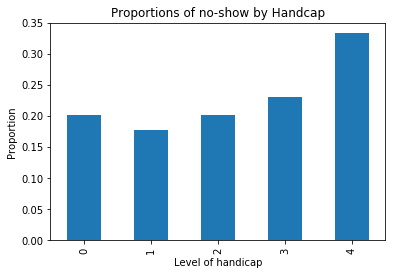

In [168]:
df.groupby('handicap')['no_show'].mean().plot(kind = 'bar')
plt.title('Proportions of no-show by Handcap');
plt.xlabel('Level of handicap');
plt.ylabel('Proportion');

根据柱形图，可以粗略看出，病人的残疾等级越高，越有可能不会在预约日期出现。

接下来，对病人是否在预约前接到短信通知会不会对病人在预约日期出现造成影响进行分析：

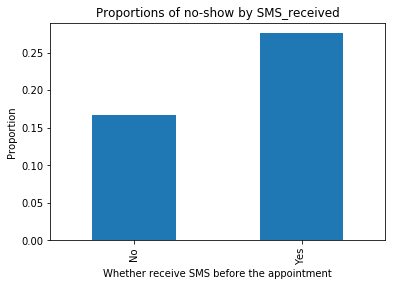

In [170]:
df.groupby('sms_received')['no_show'].mean().plot(kind = 'bar')
location = [0,1]
labels = ['No', 'Yes']
plt.title('Proportions of no-show by SMS_received');
plt.xticks(location,labels);
plt.xlabel('Whether receive SMS before the appointment');
plt.ylabel('Proportion');

根据柱形图，可以看出，在预约前收到短信通知的病人反倒更有可能在预约日期不出现。

<a id='conclusions'></a>
## 结论

> 这个数据集包含了一百多万个巴西的医疗预约的数据信息，主要围绕的问题是是否预约的病人会在预约日期出现，并且由此进行了一系列的探索和数据分析。关于这一次的数据分析，主要研究每一个预测因子与”No-show”这一结果变量之间的双变量关系。

> 结果显示，不同的性别对于病人是否会在预约日期出现没有影响，每种性别的平均出现次数没有太大分别。但是病人在周五和周六不出席的频率高于其他时间。同时，在同一天预约的病人缺席预约的概率最低。关于年龄问题，处于10-29岁年龄段的人有更高的几率在预约日期不出现。那些拥有医疗福利的，没有被诊断为高血压，糖尿病的病人更容易缺席预约。最让人奇怪的是，在预约前收到短信通知的病人反倒更有可能在预约日期不出现。

> 虽然得出了以上的结果，但是这些结果仅来自于不到两个月的时间内的观测，而且包含的数据个数也没有特别广，所以这些结果并不能完全代表所有进行预约的病人的就医趋势。同时，这些结果仅仅来自于初步的数据分析，所有的结果变量仅来源于一个预测因子的研究，并没有相互分析，所以建立更加复杂的统计模型进行深入的研究是接下来需要从事的工作。

In [171]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255